           name                               sale_id  product_id    product  \
0  Mason Howell  442bc2f0-22d3-3c8a-9f71-0f9c16cee0b2         296  Lang Club   
1  Mason Howell  442bc2f0-22d3-3c8a-9f71-0f9c16cee0b2         296  Lang Club   
2  Mason Howell  442bc2f0-22d3-3c8a-9f71-0f9c16cee0b2         296  Lang Club   
3  Mason Howell  442bc2f0-22d3-3c8a-9f71-0f9c16cee0b2         296  Lang Club   
4  Mason Howell  442bc2f0-22d3-3c8a-9f71-0f9c16cee0b2         296  Lang Club   

   price_y  quantity   price_x                 created_at  \
0  866.694   3.89990  2433.800  1997-09-17 21:50:14+00:00   
1  866.694   4.00000  1196.580  1997-09-17 21:50:14+00:00   
2  866.694   1.38452  1975.000  1997-09-17 21:50:14+00:00   
3  866.694   2.22500   119.526  1997-09-17 21:50:14+00:00   
4  866.694   2.89000  2386.940  1997-09-17 21:50:14+00:00   

                  updated_at                     email  
0  2007-02-15 19:34:06+00:00  jessica.cole@example.net  
1  2007-02-15 19:34:06+00:00  jessica.

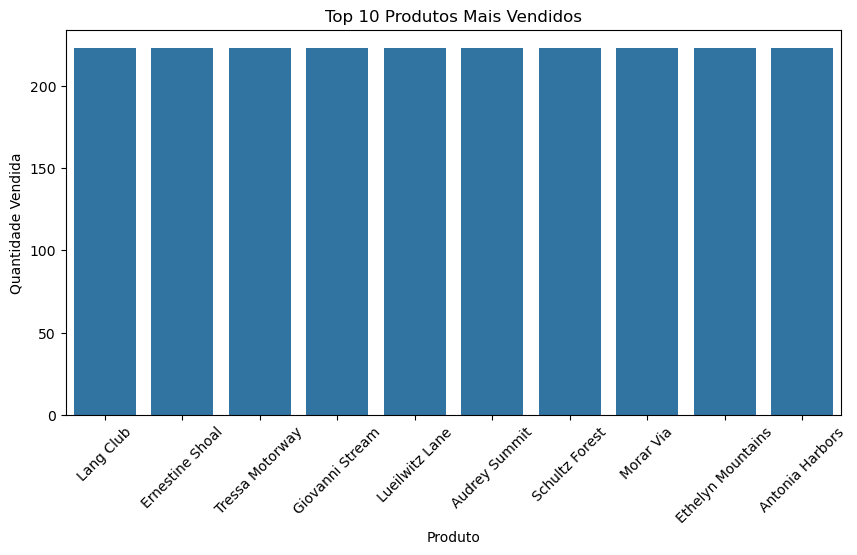

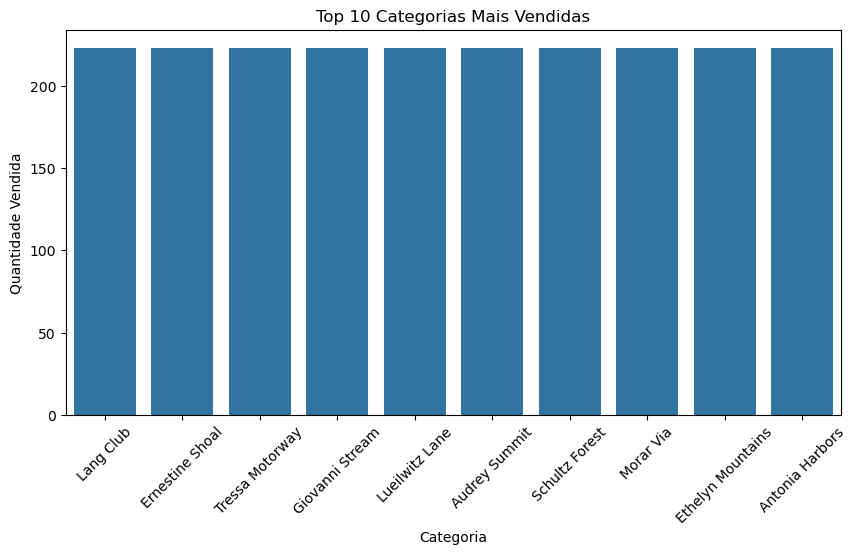

C:\Users\Usuário\AppData\Local\Temp\ipykernel_6248\1016239324.py:53: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['month'] = df['created_at'].dt.to_period('M')


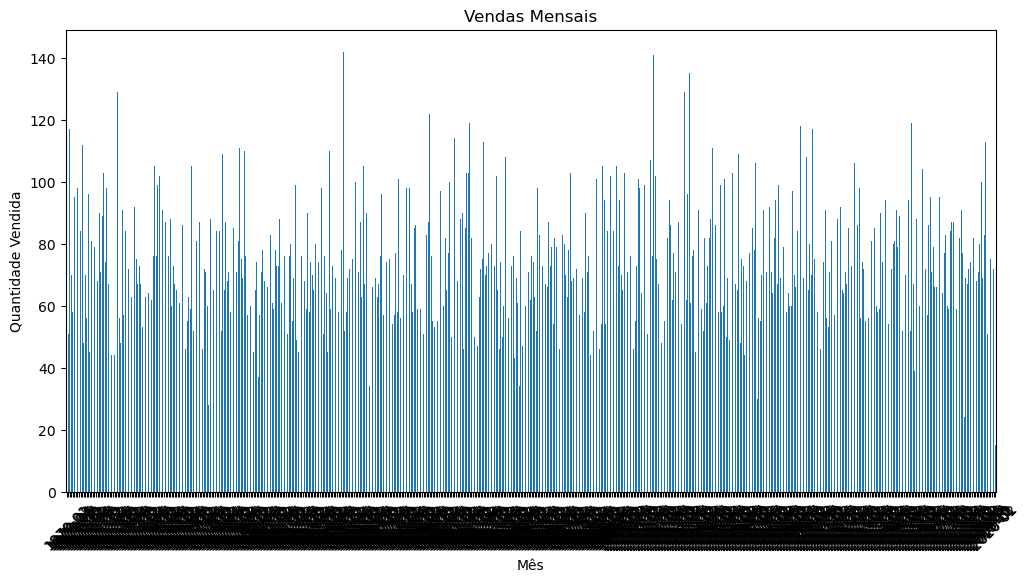

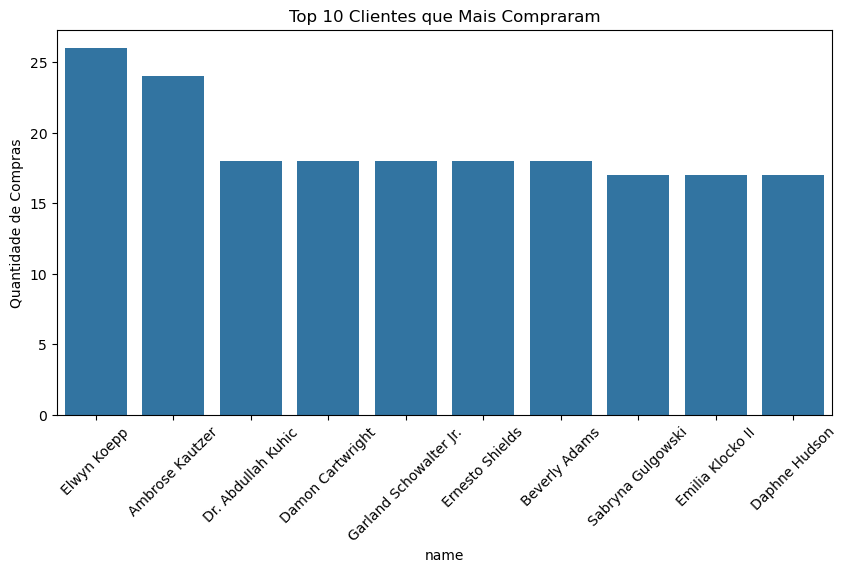

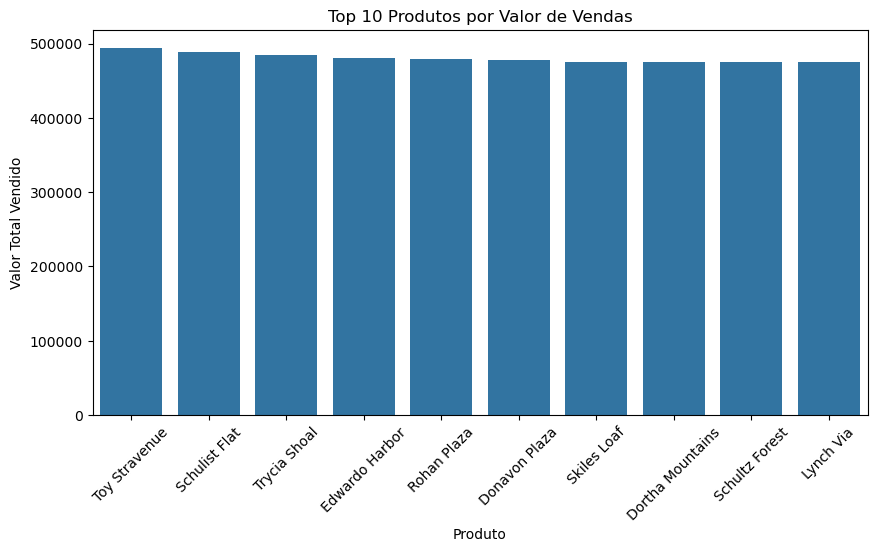

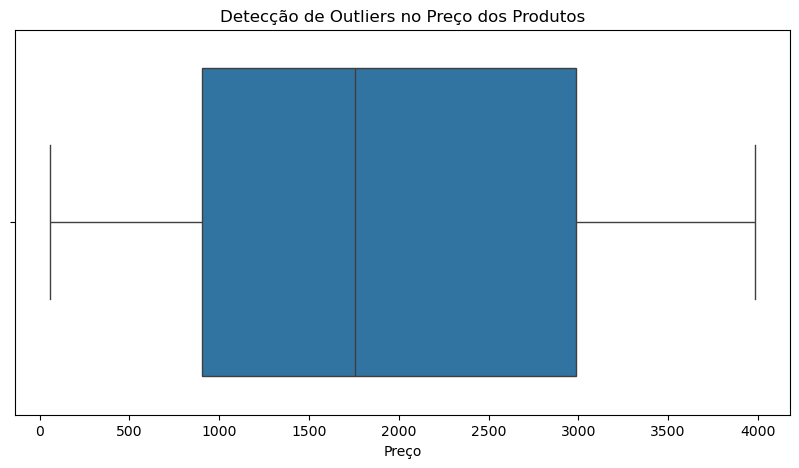

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# Carregar os dados
df = pd.read_csv("tudo.csv")

# Exibir as primeiras linhas
print(df.head())

# Verificar se há valores nulos
print(df.isnull().sum())

df.drop_duplicates(inplace=True)

# Verificar se a coluna 'produto' existe no DataFrame
if 'product' not in df.columns:
    print("Erro: A coluna 'produto' não está presente no arquivo CSV.")
    exit()

df["total_venda"] = df["price_y"] * df["quantity"]
ticket_medio = df.groupby("sale_id")["total_venda"].mean()
print("Ticket médio:", ticket_medio.mean())

# Produtos mais vendidos
top_produtos = df['product'].value_counts().head(10)

# Plotar o gráfico de barras
plt.figure(figsize=(10, 5))
sns.barplot(x=top_produtos.index, y=top_produtos.values)
plt.xticks(rotation=45)
plt.title("Top 10 Produtos Mais Vendidos")
plt.xlabel("Produto")
plt.ylabel("Quantidade Vendida")
plt.show()

# Análise de Vendas por Categoria (se a coluna 'categoria' existir)
if 'product' in df.columns:
    top_categorias = df['product'].value_counts().head(10)
    plt.figure(figsize=(10, 5))
    sns.barplot(x=top_categorias.index, y=top_categorias.values)
    plt.xticks(rotation=45)
    plt.title("Top 10 Categorias Mais Vendidas")
    plt.xlabel("Categoria")
    plt.ylabel("Quantidade Vendida")
    plt.show()

# Análise Temporal (Vendas Mensais)
if 'created_at' in df.columns:
    df['created_at'] = pd.to_datetime(df['created_at'])
    df['month'] = df['created_at'].dt.to_period('M')
    vendas_mensais = df.groupby('month').size()
    plt.figure(figsize=(12, 6))
    vendas_mensais.plot(kind='bar')
    plt.title("Vendas Mensais")
    plt.xlabel("Mês")
    plt.ylabel("Quantidade Vendida")
    plt.xticks(rotation=45)
    plt.show()

# Análise de Clientes (Clientes que mais compraram)
if 'name' in df.columns:
    top_clientes = df['name'].value_counts().head(10)
    plt.figure(figsize=(10, 5))
    sns.barplot(x=top_clientes.index, y=top_clientes.values)
    plt.xticks(rotation=45)
    plt.title("Top 10 Clientes que Mais Compraram")
    plt.xlabel("name")
    plt.ylabel("Quantidade de Compras")
    plt.show()

# Análise de Valores de Vendas (se a coluna 'price' existir)
if 'price_x' in df.columns:
    valor_vendas_produto = df.groupby('product')['price_x'].sum().sort_values(ascending=False).head(10)
    plt.figure(figsize=(10, 5))
    sns.barplot(x=valor_vendas_produto.index, y=valor_vendas_produto.values)
    plt.xticks(rotation=45)
    plt.title("Top 10 Produtos por Valor de Vendas")
    plt.xlabel("Produto")
    plt.ylabel("Valor Total Vendido")
    plt.show()

# Detecção de Outliers (se a coluna 'price' existir)
if 'price_y' in df.columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df['price_y'])
    plt.title("Detecção de Outliers no Preço dos Produtos")
    plt.xlabel("Preço")
    plt.show()



